In [2]:
%matplotlib inline
from casatasks import tclean, ft, clearcal, uvsub, split
from casatools import ms, table, msmetadata
from spectral_cube import SpectralCube
import spectral_cube
import numpy as np
from astropy import units as u, visualization
from astropy.visualization import simple_norm
import pylab as pl

import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)
warnings.simplefilter('ignore', spectral_cube.utils.PossiblySlowWarning)

visualization.quantity_support()
ms = ms()
msmd = msmetadata()
tb = table()

In [3]:
pl.rcParams['font.size'] = 14
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['image.interpolation'] = 'none'
pl.rcParams['figure.facecolor'] = 'w'

From the casa docs:
"alpha = taylorcoeff_1 / taylorcoeff_0"

In [4]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L


In [5]:
finaliter_prefix = "imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter"

/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encou

Text(0.5, 1.0, 'model.tt1')

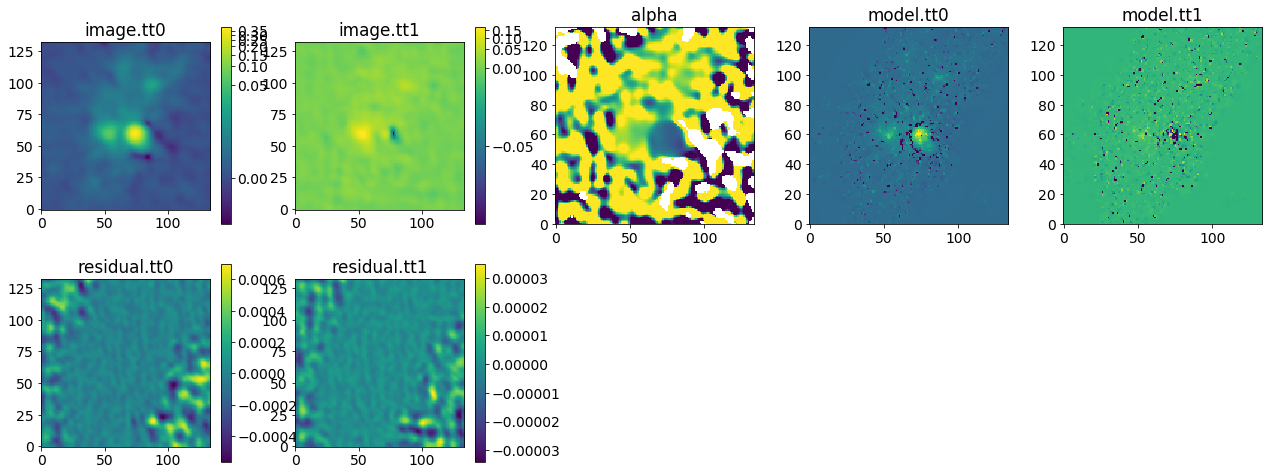

In [6]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,5",5")'
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

In [7]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 5*tt0_std)# & (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem

In [8]:
1 / (image.wcs.pixel_scale_matrix[1,1] * 3600)

26.666666666666664

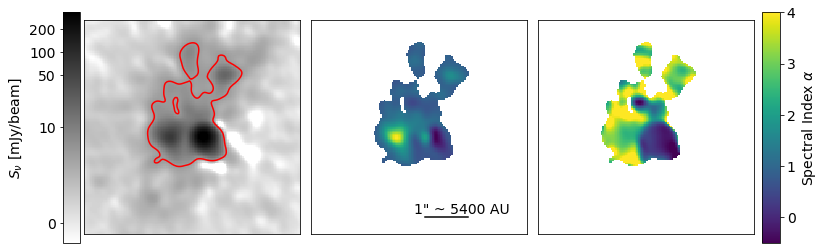

In [9]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 5*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem
fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value*1e3, cmap='gray_r', norm=simple_norm(image[0].value*1e3, stretch='log', min_percent=2, max_percent=99.9));
ax.contour(image[0].value, levels=[5*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_ticks([0,10,50,100,200])
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([70,70+1/cd], [10,10], color='k')
ax.annotate('1" ~ 5400 AU', (50+1/cd/2, 12),)
ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=4, vmin=-0.5); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("paper_figures/W51-e2_B3_spectral_index.pdf", bbox_inches='tight')

/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encou

Text(0.5, 1.0, 'model.tt1')

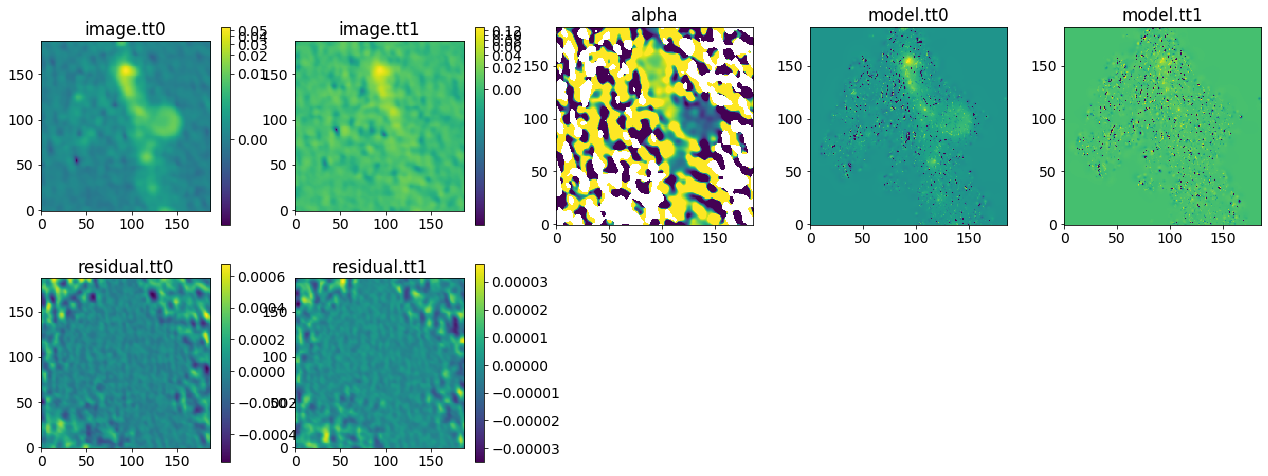

In [10]:
cutoutregion = 'fk5; box(19:23:43.90,+14:30:26.0,7",7")'
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

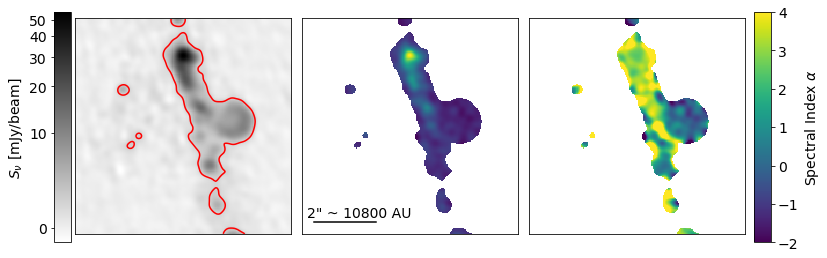

In [11]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 5*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem
fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value*1e3, cmap='gray_r', norm=simple_norm(image[0].value*1e3, stretch='asinh'));
ax.contour(image[0].value, levels=[5*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([10,10+2/cd], [10,10], color='k')
ax.annotate('2" ~ 10800 AU', (4, 14),)
ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=4, vmin=-2); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("paper_figures/W51-e1e8_B3_spectral_index.pdf", bbox_inches='tight')

/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encou

Text(0.5, 1.0, 'model.tt1')

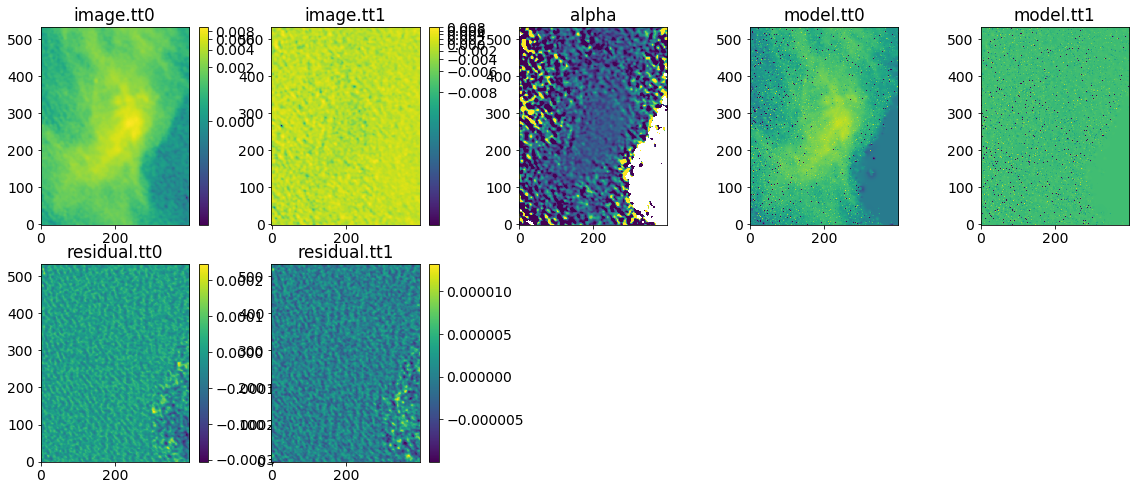

In [12]:
cutoutregion = 'fk5; box(19:23:42.00,+14:30:36.0,15",20")'
pl.figure(figsize=(20,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

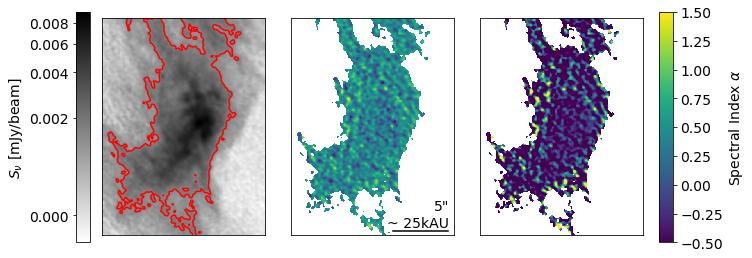

In [13]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 1.5*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem
fig = pl.figure(figsize=(10,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value, cmap='gray_r', norm=simple_norm(image[0].value, stretch='asinh'));
ax.contour(image[0].value, levels=[1.5*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([250,250+5/cd], [10,10], color='k')
ax.annotate('5"\n~ 25kAU', (320+5/cd/2, 20), horizontalalignment='right')

ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=1.5, vmin=-0.5); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("paper_figures/W51-IRS1_B3_spectral_index.pdf", bbox_inches='tight')

In [14]:
finaliter_prefix = "imaging_results/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter"

/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encou

Text(0.5, 1.0, 'model.tt1')

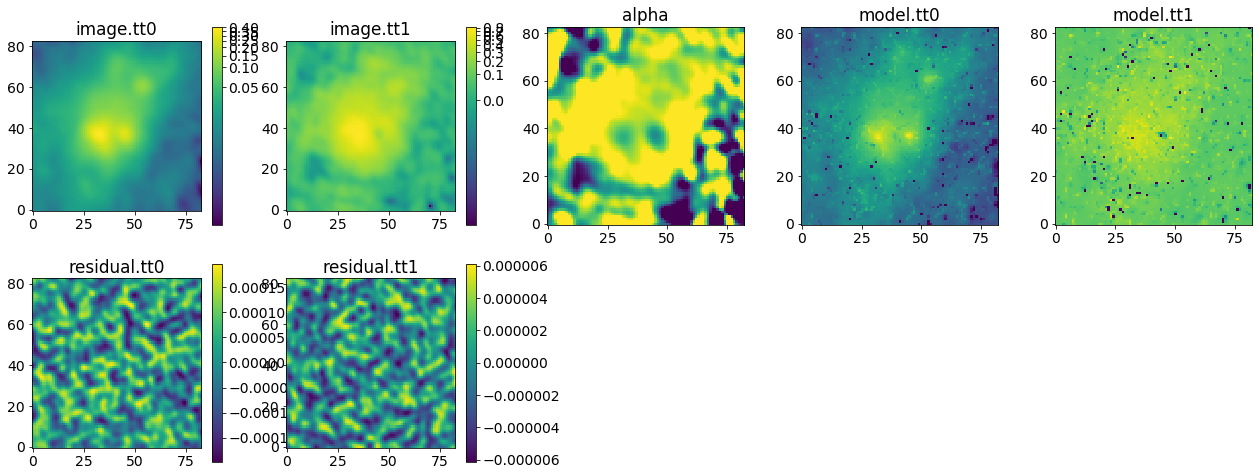

In [15]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,5",5")'
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

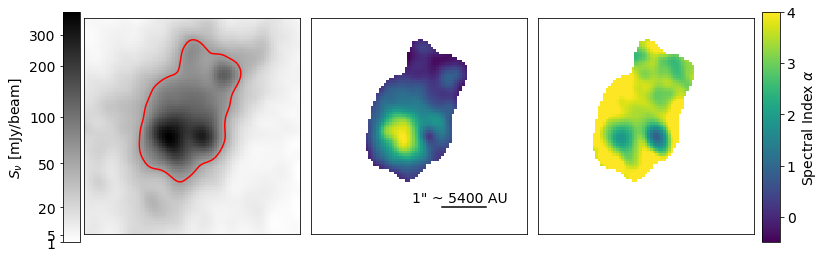

In [16]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 3*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem
fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value*1e3, cmap='gray_r', norm=simple_norm(image[0].value*1e3, stretch='asinh', min_percent=0, max_percent=99.999));
ax.contour(image[0].value, levels=[3*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_ticks([1,5,20,50,100, 200, 300])
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([50,50+1/cd], [10,10], color='k')
ax.annotate('1" ~ 5400 AU', (30+1/cd/2, 12),)
ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=4, vmin=-0.5); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("paper_figures/W51-e2_B6_spectral_index.pdf", bbox_inches='tight')

/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encou

Text(0.5, 1.0, 'model.tt1')

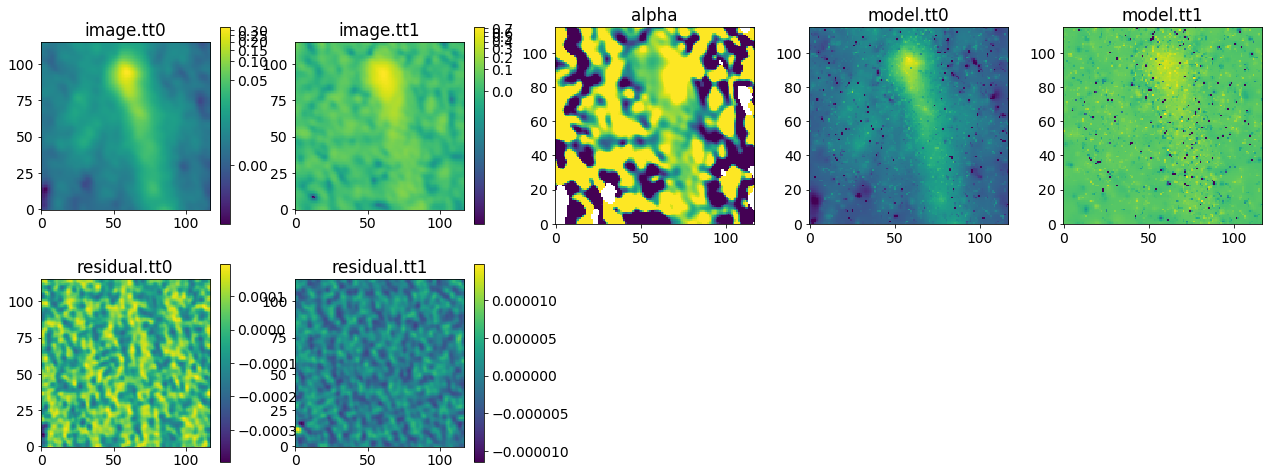

In [17]:
cutoutregion = 'fk5; box(19:23:43.90,+14:30:26.0,7",7")'
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

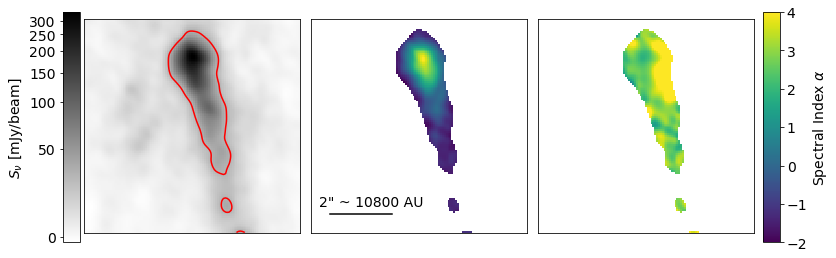

In [18]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 5*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem
fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value*1e3, cmap='gray_r', norm=simple_norm(image[0].value*1e3, stretch='asinh'));
ax.contour(image[0].value, levels=[5*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([10,10+2/cd], [10,10], color='k')
ax.annotate('2" ~ 10800 AU', (4, 14),)
ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=4, vmin=-2); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("paper_figures/W51-e1e8_B6_spectral_index.pdf", bbox_inches='tight')

/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adamginsburg/.local/lib/python3.6/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encou

Text(0.5, 1.0, 'model.tt1')

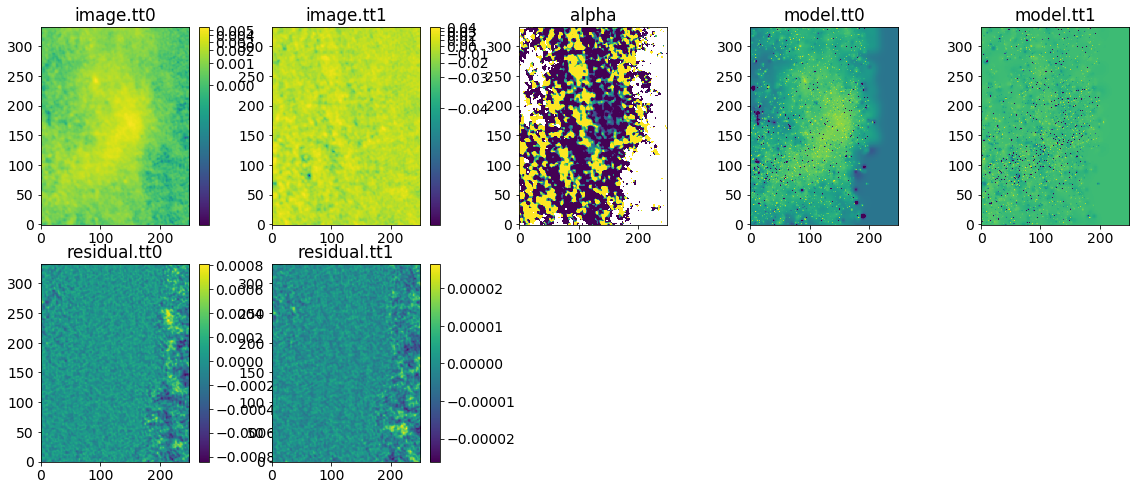

In [19]:
cutoutregion = 'fk5; box(19:23:42.00,+14:30:36.0,15",20")'
pl.figure(figsize=(20,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

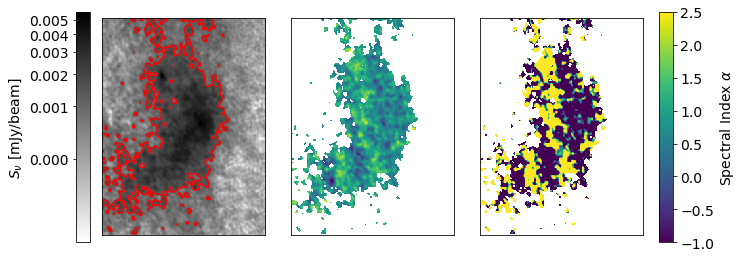

In [20]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 1.5*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem
fig = pl.figure(figsize=(10,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value, cmap='gray_r', norm=simple_norm(image[0].value, stretch='asinh'));
ax.contour(image[0].value, levels=[1.5*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=2.5, vmin=-1); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("paper_figures/W51-IRS1_B6_spectral_index.pdf", bbox_inches='tight')